In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
cc_df = pd.read_csv('C:/Users/forqu/OneDrive/Documentos/IronHack/Github/Data/Data_M03-L05-CreditCardDataset/CC GENERAL.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
cc_df=cc_df.set_index('CUST_ID')

In [5]:
cc_df['MINIMUM_PAYMENTS'] = np.where(cc_df['MINIMUM_PAYMENTS'].isna(),cc_df['PAYMENTS'],cc_df['MINIMUM_PAYMENTS'])
cc_df['CREDIT_LIMIT']=  np.where(cc_df['CREDIT_LIMIT'].isna(),cc_df['PAYMENTS'],cc_df['CREDIT_LIMIT'])

In [6]:
cc_df_scaler = StandardScaler()
cc_df_std = pd.DataFrame(cc_df_scaler.fit_transform(cc_df),
                           columns = cc_df.columns)

In [22]:
cc_df_pca = PCA()
cc_df_pca.fit(cc_df_std)
print((cc_df_pca.explained_variance_ratio_))

[2.73000536e-01 2.03104689e-01 8.77991290e-02 7.47126461e-02
 6.25873176e-02 5.72730840e-02 4.87606805e-02 4.31365625e-02
 3.80677256e-02 3.07907425e-02 2.37292494e-02 1.78183342e-02
 1.43188453e-02 1.21123021e-02 1.01171739e-02 2.67029715e-03
 6.85227033e-07]


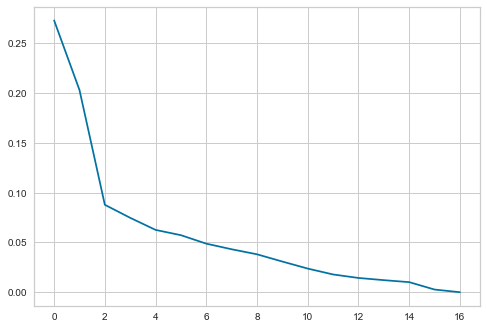

In [10]:
plt.plot(cc_df_pca.explained_variance_ratio_);

In [39]:
cc_df_pca = PCA(6)
cc_df_pca = pd.DataFrame(cc_df_pca.fit_transform(cc_df_std), columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])

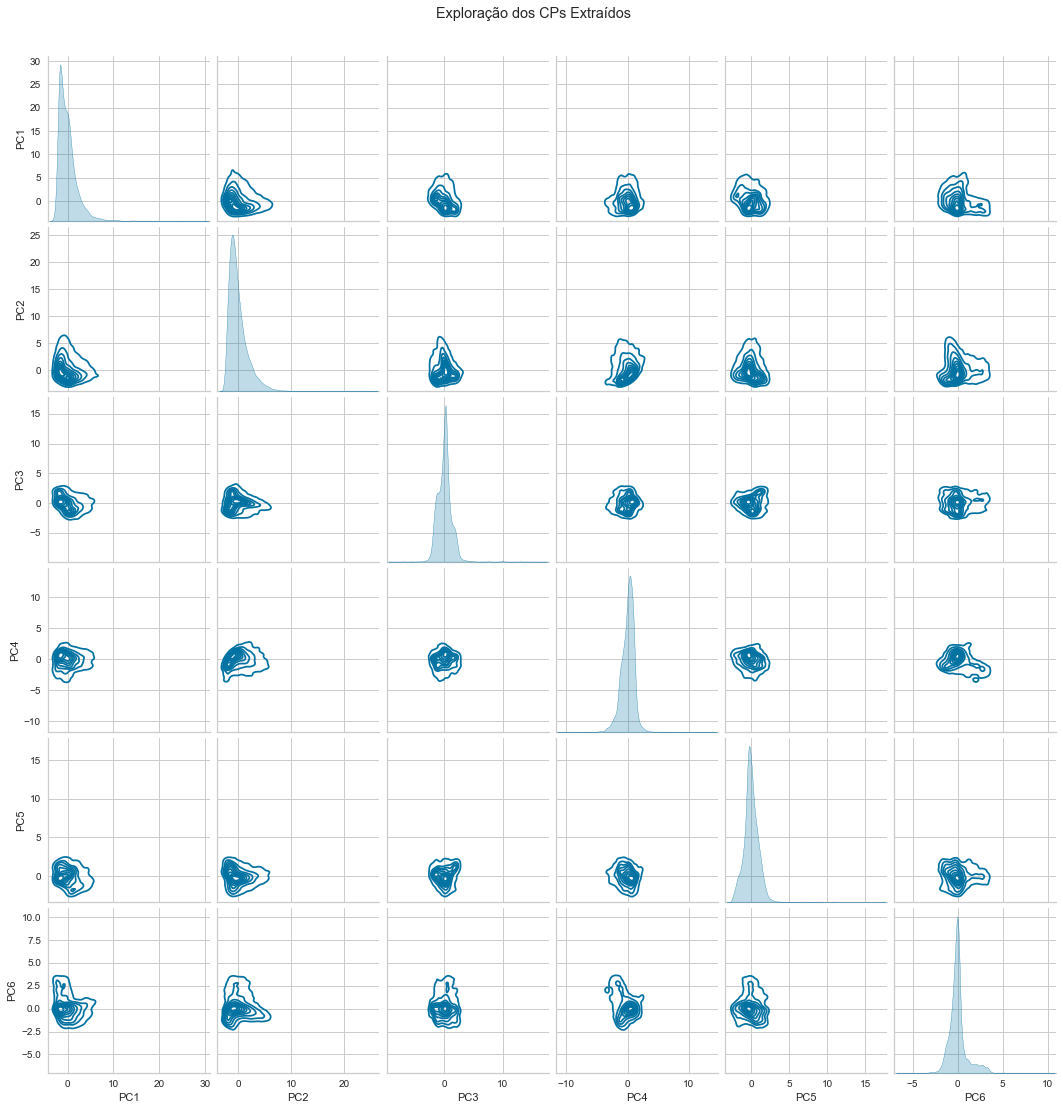

In [40]:
rel = sns.pairplot(cc_df_pca, kind = 'kde');
rel.fig.suptitle('Exploração dos CPs Extraídos', y=1.03);

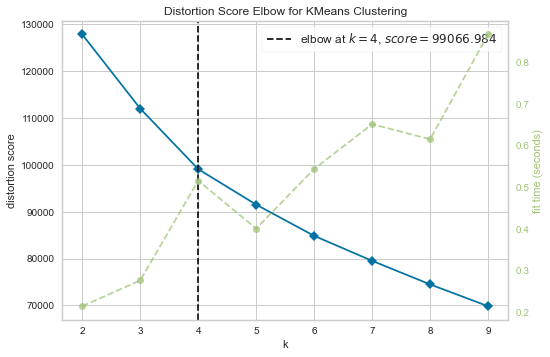

In [41]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(cc_df_std)
visualizer.show();

In [42]:
cc_df_pca = PCA(4)
cc_df_pca = pd.DataFrame(cc_df_pca.fit_transform(cc_df_std), columns = ['PC1', 'PC2', 'PC3', 'PC4'])

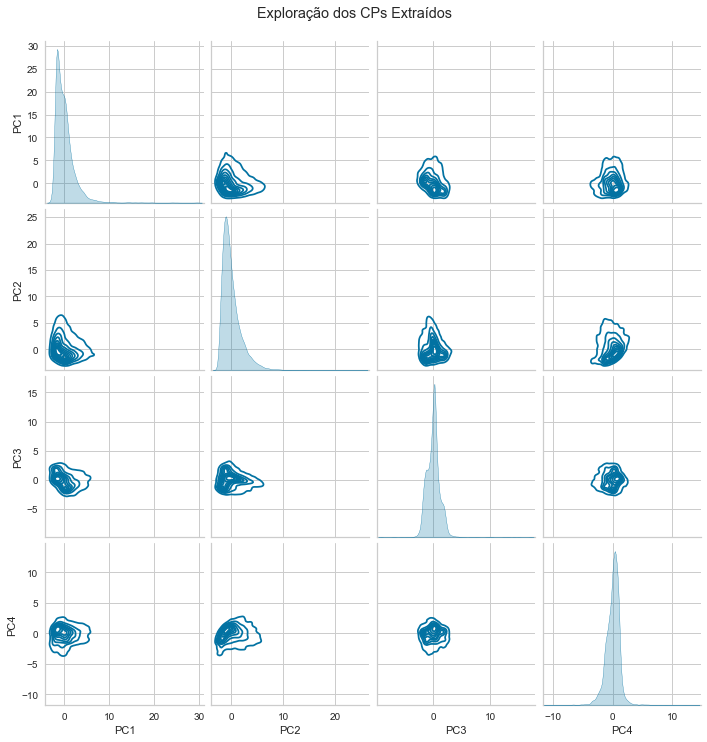

In [43]:
rel = sns.pairplot(cc_df_pca, kind = 'kde');
rel.fig.suptitle('Exploração dos CPs Extraídos', y=1.03);

In [73]:
cc_df_k4 = KMeans(4).fit(cc_df_pca).labels_
cc_df_k6 = AgglomerativeClustering(n_clusters = 6, linkage = 'ward').fit_predict(cc_df_pca)

In [74]:
cc_df['cc_df_k4'] = [str(x) for x in cc_df_k4]
cc_df['cc_df_k6'] = [str(x) for x in cc_df_k6]

In [98]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

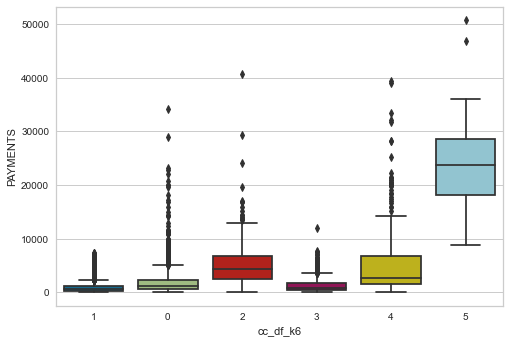

In [99]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'PAYMENTS');

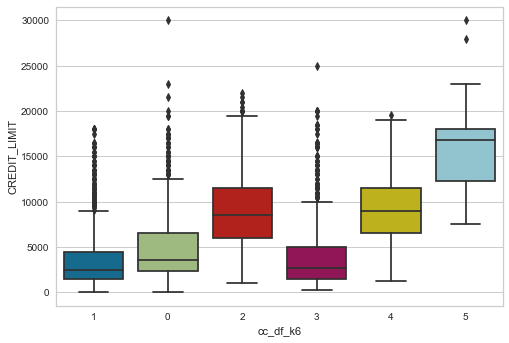

In [84]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'CREDIT_LIMIT');

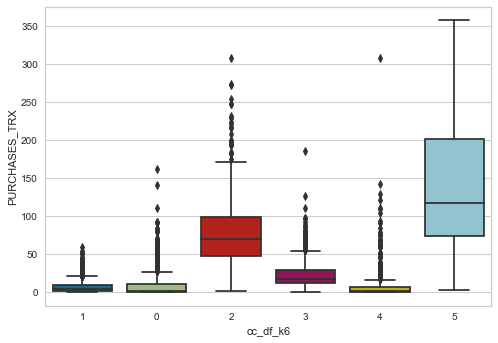

In [103]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'PURCHASES_TRX');

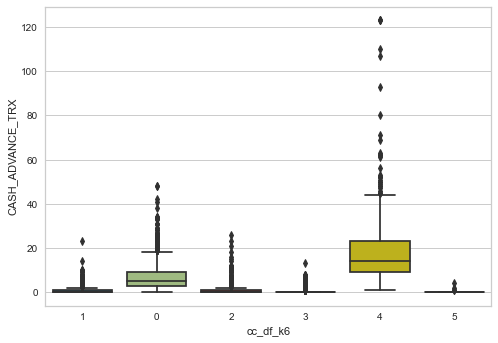

In [104]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'CASH_ADVANCE_TRX');

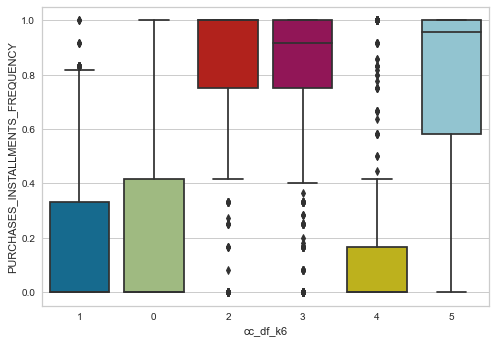

In [105]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'PURCHASES_INSTALLMENTS_FREQUENCY');

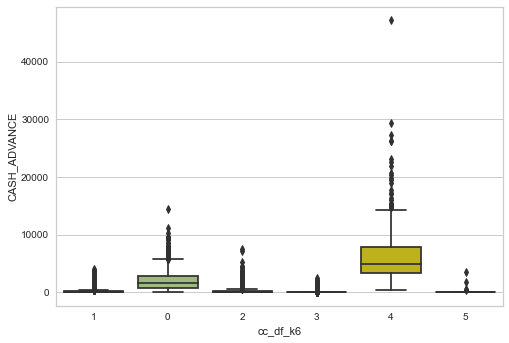

In [97]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'CASH_ADVANCE'); 

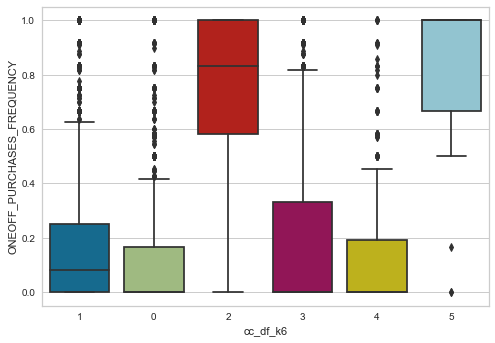

In [106]:
sns.boxplot(data = cc_df, x = 'cc_df_k6', y = 'ONEOFF_PURCHASES_FREQUENCY');

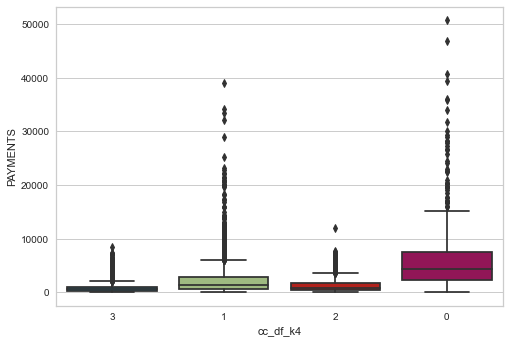

In [107]:
sns.boxplot(data = cc_df, x = 'cc_df_k4', y = 'PAYMENTS');

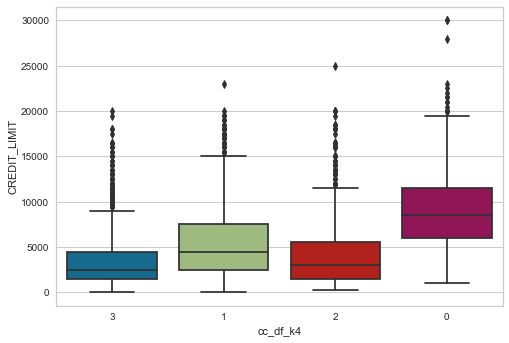

In [108]:
sns.boxplot(data = cc_df, x = 'cc_df_k4', y = 'CREDIT_LIMIT');

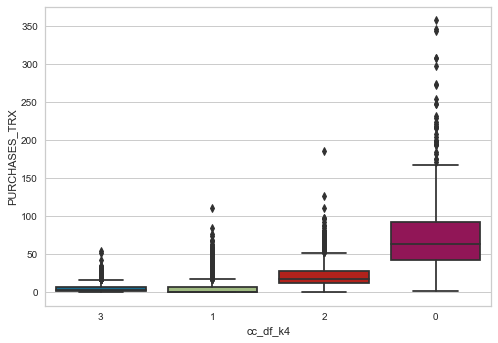

In [109]:
sns.boxplot(data = cc_df, x = 'cc_df_k4', y = 'PURCHASES_TRX');

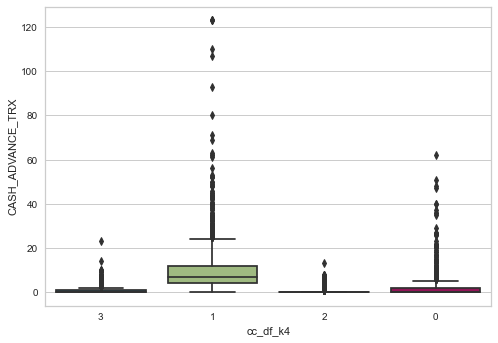

In [110]:
sns.boxplot(data = cc_df, x = 'cc_df_k4', y = 'CASH_ADVANCE_TRX');

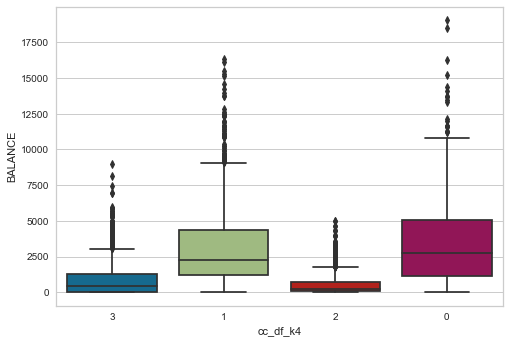

In [111]:
sns.boxplot(data = cc_df, x = 'cc_df_k4', y = 'BALANCE');

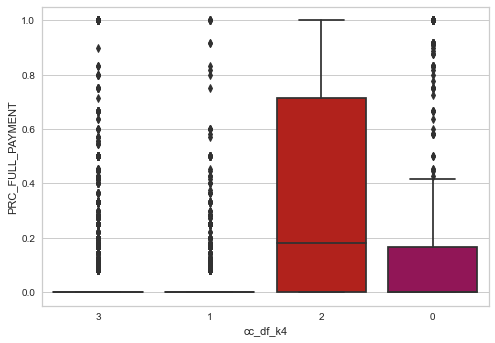

In [94]:
sns.boxplot(data = cc_df, x = 'cc_df_k4', y = 'PRC_FULL_PAYMENT'); 